**Predicting Bitcoin Price (BTC-USD) using Machine Learning**

In [7]:
# Import necessary packages
# Our data source is Yahoo Finance

import yfinance as yf
import pandas as pd
import os

In [8]:
BTC_USD = yf.Ticker("BTC-USD")
BTC_USD = BTC_USD.history(period="max")
BTC_USD

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-28 00:00:00+00:00,63423.515625,64321.484375,62793.597656,63113.230469,17334827993,0.0,0.0
2024-04-29 00:00:00+00:00,63106.363281,64174.878906,61795.457031,63841.121094,26635912073,0.0,0.0
2024-04-30 00:00:00+00:00,63839.417969,64703.332031,59120.066406,60636.855469,37840840057,0.0,0.0


In [9]:
BTC_USD.index  # first row. Later it will be used for slicing

DatetimeIndex(['2014-09-17 00:00:00+00:00', '2014-09-18 00:00:00+00:00',
               '2014-09-19 00:00:00+00:00', '2014-09-20 00:00:00+00:00',
               '2014-09-21 00:00:00+00:00', '2014-09-22 00:00:00+00:00',
               '2014-09-23 00:00:00+00:00', '2014-09-24 00:00:00+00:00',
               '2014-09-25 00:00:00+00:00', '2014-09-26 00:00:00+00:00',
               ...
               '2024-04-23 00:00:00+00:00', '2024-04-24 00:00:00+00:00',
               '2024-04-25 00:00:00+00:00', '2024-04-26 00:00:00+00:00',
               '2024-04-27 00:00:00+00:00', '2024-04-28 00:00:00+00:00',
               '2024-04-29 00:00:00+00:00', '2024-04-30 00:00:00+00:00',
               '2024-05-01 00:00:00+00:00', '2024-05-02 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=3516, freq=None)

## Data Clean up and Visualization

<Axes: xlabel='Date'>

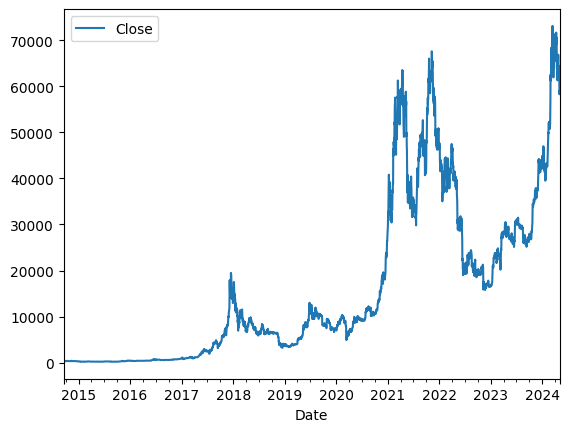

In [10]:
# Let's plot and see the time series data
# Plot the closing price vs. the index
BTC_USD.plot.line(y = 'Close', use_index = True)

In [11]:
# Let's drop the empty columns
del BTC_USD['Dividends']
del BTC_USD['Stock Splits']
BTC_USD

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-04-28 00:00:00+00:00,63423.515625,64321.484375,62793.597656,63113.230469,17334827993
2024-04-29 00:00:00+00:00,63106.363281,64174.878906,61795.457031,63841.121094,26635912073
2024-04-30 00:00:00+00:00,63839.417969,64703.332031,59120.066406,60636.855469,37840840057


**Target for Machine Learning**

In [12]:
# Create a column to hold tomorrow's Price
BTC_USD['Tomorrow'] = BTC_USD['Close'].shift(-1)
BTC_USD

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,424.440002
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,394.795990
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,408.903992
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,398.821014
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,402.152008
...,...,...,...,...,...,...
2024-04-28 00:00:00+00:00,63423.515625,64321.484375,62793.597656,63113.230469,17334827993,63841.121094
2024-04-29 00:00:00+00:00,63106.363281,64174.878906,61795.457031,63841.121094,26635912073,60636.855469
2024-04-30 00:00:00+00:00,63839.417969,64703.332031,59120.066406,60636.855469,37840840057,58254.011719


Tomorrow Price == Today's Close Price. The goal is to predict tomorrow Price.

In [13]:
BTC_USD['Target'] = (BTC_USD['Tomorrow'] > BTC_USD['Close']).astype(int)

In [14]:
BTC_USD

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,402.152008,1
...,...,...,...,...,...,...,...
2024-04-28 00:00:00+00:00,63423.515625,64321.484375,62793.597656,63113.230469,17334827993,63841.121094,1
2024-04-29 00:00:00+00:00,63106.363281,64174.878906,61795.457031,63841.121094,26635912073,60636.855469,0
2024-04-30 00:00:00+00:00,63839.417969,64703.332031,59120.066406,60636.855469,37840840057,58254.011719,0


The Target shows 0 when price went down, and 1 when the price went up.

In [15]:
# Let's write an initial Machine Learning Model and train it
# There is no linear relationship between the Open price and Target
# RandomForest is good for non-linear relationship

from sklearn.ensemble import RandomForestClassifier

# initialize the model
model = RandomForestClassifier(n_estimators=500,min_samples_split=100, random_state= 1)
# n_estimators: no. of individual decision trees we want to train upto a limit, higher the n_esimator, better the model.
# min_samples_split: Protect against over fitting

In [16]:
# Now split the data into train and test
# Keep in mind: Can't use cross validation in time series data. It kills the nature of time series

train = BTC_USD.iloc[:-100]
test = BTC_USD.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, n_estimators=500, random_state=1)

In [17]:
# Measure if the model is good
# Precision Score tells if the market goes up when it says it will go up (1)

from sklearn.metrics import precision_score

# Let's generate predictions
predictions = model.predict(test[predictors])
predictions

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [18]:
# Since the predictions are in numpy array let's change it to pandas series
predictions = pd.Series(predictions, index = test.index)
predictions

Date
2024-01-24 00:00:00+00:00    1
2024-01-25 00:00:00+00:00    1
2024-01-26 00:00:00+00:00    1
2024-01-27 00:00:00+00:00    0
2024-01-28 00:00:00+00:00    1
                            ..
2024-04-28 00:00:00+00:00    0
2024-04-29 00:00:00+00:00    0
2024-04-30 00:00:00+00:00    1
2024-05-01 00:00:00+00:00    1
2024-05-02 00:00:00+00:00    0
Length: 100, dtype: int64

In [19]:
precision_score(test['Target'], predictions)

0.6923076923076923

The Precision Score is not that great. It predicted 70% of the times correctly

<Axes: xlabel='Date'>

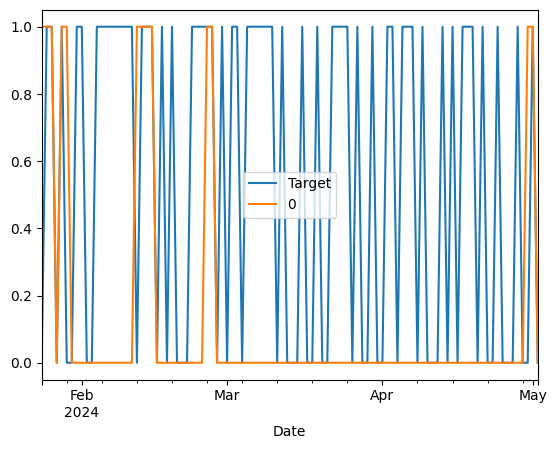

In [20]:
# To plot the predictions, let's combine actual value with the predicted values
combined = pd.concat([test['Target'], predictions], axis = 1) # axis = 1--> treat each input as columns
combined.plot()

Here, blue line is the actual data, and orange line is the prediction. In most cases, when it predicted that the price would go down (0), it actually went up (1). Not good!

Let's build a better and robust model. New model will test the algorithm with multiple years of data.

We will use something called **Backtesting**. A backtesting algorithm is a method used in finance to evaluate the performance of a trading strategy or investment strategy using historical data. The idea is to simulate how a given strategy would have performed on past data and assess its effectiveness and potential profitability.

It's essential to remember that backtesting has limitations and assumptions. It relies on historical data, which may not accurately represent future market conditions. Overfitting, survivorship bias, and data snooping are common pitfalls that need to be addressed to ensure the reliability of backtesting results.

In [32]:
# Let's first create a Prediction Function

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [33]:
# Train the first model with 10 years of data (start=2500) 250 trading days per year)
# step = 250: training the model for a year and going to the next
# We will take first 10 years of data and predict for values of the 11th year.
# Then, we'll take 11 years of data and predict for values of the 12 years, and so on.

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions) #concat takes the list of df and combine into a single df

In [34]:
predictions = backtest(BTC_USD, model, predictors)

In [35]:
predictions['Predictions'].value_counts()

# predicts how many days the market would go down (0), and go up (0)

Predictions
0    551
1    465
Name: count, dtype: int64

In [36]:
precision_score(predictions['Target'], predictions['Predictions'])

0.4752688172043011

So 47% of the time we predicted the market correctly. We can look at the benchmark data. The percentage of the days the market actually went up is value counts of the Target divided by the total number of rows.

In [38]:
predictions['Target'].value_counts() / predictions.shape[0]


Target
0    0.503937
1    0.496063
Name: count, dtype: float64

The BTC price almost evenly went up and down (50%).
What can we tell about the model?
Since our prediction score is 0.475, our model did worst than the actual market trend (0.496).

Now, let's refine our model by adding Additional Predictors.

1. Add Rolling Averages

Eye balling. Is the stock the price higher than yesterday, a week ago or last?
Let's give this info to our algorithm
last 2 days, last 5 days (week), 3 months, last year and four years.

Find the ratio between today's closing price and closing price in these periods.
This will give us a hint that if the market has really gone up, it may be due for a downturn, and vice versa.

In [44]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = BTC_USD.rolling(horizon).mean()
  ratio_column = f'Close_Ratio_{horizon}'
  BTC_USD[ratio_column] = BTC_USD['Close'] / rolling_averages['Close']
  trend_column = f'Trend_{horizon}'
  BTC_USD[trend_column] = BTC_USD.shift(1).rolling(horizon).sum()["Target"]

  new_predictors+= [ratio_column, trend_column]

In [50]:
BTC_USD

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2017-06-13 00:00:00+00:00,2680.909912,2789.040039,2650.379883,2717.020020,1781200000,2506.370117,0,1.010674,1.0,0.963053,4.0,1.432064,45.0,2.367277,165.0,4.776714,560.0
2017-06-14 00:00:00+00:00,2716.879883,2786.830078,2412.939941,2506.370117,1696560000,2464.580078,0,0.959672,1.0,0.908840,3.0,1.305737,44.0,2.169459,164.0,4.390307,560.0
2017-06-15 00:00:00+00:00,2499.580078,2534.709961,2212.959961,2464.580078,2026259968,2518.560059,1,0.991593,0.0,0.926136,2.0,1.269834,43.0,2.119742,163.0,4.301510,560.0
2017-06-16 00:00:00+00:00,2469.570068,2539.919922,2385.149902,2518.560059,1195190016,2655.879883,1,1.010833,1.0,0.978754,2.0,1.283052,43.0,2.152088,164.0,4.379597,560.0
2017-06-17 00:00:00+00:00,2514.010010,2685.189941,2484.959961,2655.879883,1534509952,2548.290039,0,1.026538,2.0,1.032419,3.0,1.336618,43.0,2.253736,164.0,4.600330,561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-27 00:00:00+00:00,63750.988281,63898.363281,62424.718750,63419.140625,19530783039,63113.230469,0,0.997357,0.0,0.983730,1.0,0.948593,32.0,1.433935,134.0,1.792175,494.0
2024-04-28 00:00:00+00:00,63423.515625,64321.484375,62793.597656,63113.230469,17334827993,63841.121094,1,0.997582,0.0,0.989092,1.0,0.943875,31.0,1.422249,134.0,1.782326,494.0
2024-04-29 00:00:00+00:00,63106.363281,64174.878906,61795.457031,63841.121094,26635912073,60636.855469,0,1.005733,1.0,1.001868,2.0,0.954132,32.0,1.433817,134.0,1.801574,495.0


When pandas doesn't find enough days to compute rolling averages, it spits out NAN

In [68]:
BTC_USD = BTC_USD.dropna()
BTC_USD

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2017-06-13 00:00:00+00:00,2680.909912,2789.040039,2650.379883,2717.020020,1781200000,2506.370117,0,1.010674,1.0,0.963053,4.0,1.432064,45.0,2.367277,165.0,4.776714,560.0
2017-06-14 00:00:00+00:00,2716.879883,2786.830078,2412.939941,2506.370117,1696560000,2464.580078,0,0.959672,1.0,0.908840,3.0,1.305737,44.0,2.169459,164.0,4.390307,560.0
2017-06-15 00:00:00+00:00,2499.580078,2534.709961,2212.959961,2464.580078,2026259968,2518.560059,1,0.991593,0.0,0.926136,2.0,1.269834,43.0,2.119742,163.0,4.301510,560.0
2017-06-16 00:00:00+00:00,2469.570068,2539.919922,2385.149902,2518.560059,1195190016,2655.879883,1,1.010833,1.0,0.978754,2.0,1.283052,43.0,2.152088,164.0,4.379597,560.0
2017-06-17 00:00:00+00:00,2514.010010,2685.189941,2484.959961,2655.879883,1534509952,2548.290039,0,1.026538,2.0,1.032419,3.0,1.336618,43.0,2.253736,164.0,4.600330,561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-27 00:00:00+00:00,63750.988281,63898.363281,62424.718750,63419.140625,19530783039,63113.230469,0,0.997357,0.0,0.983730,1.0,0.948593,32.0,1.433935,134.0,1.792175,494.0
2024-04-28 00:00:00+00:00,63423.515625,64321.484375,62793.597656,63113.230469,17334827993,63841.121094,1,0.997582,0.0,0.989092,1.0,0.943875,31.0,1.422249,134.0,1.782326,494.0
2024-04-29 00:00:00+00:00,63106.363281,64174.878906,61795.457031,63841.121094,26635912073,60636.855469,0,1.005733,1.0,1.001868,2.0,0.954132,32.0,1.433817,134.0,1.801574,495.0


Due to this, up to 4 years of data is lost.

But, This should improve our Model. Hopefully!


In [76]:
model = RandomForestClassifier(n_estimators=2000, min_samples_split=50,random_state=1)

Let's rewrite the predict function.
When `.predict` is run, the model returns 0 or 1.
We need a little control over how we define 0 or 1.
`predict_proba' method return probability that a row is 0 or 1.

Set a custom threshold, default is 0.5.

    `preds[preds>=0.6] = 1`
    `preds[preds<0.6] = 0`

    If there is greater than 60% that the price goes up, it returns 1.
    This makes the model for confident.


In [77]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] # second column: prob that price goes up
    preds[preds>=0.6] = 1
    preds[preds<0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [78]:
predictions = backtest(BTC_USD, model, new_predictors)

In [79]:
predictions["Predictions"].value_counts()

Predictions
0.0    11
1.0     4
Name: count, dtype: int64

In [80]:
precision_score(predictions["Target"], predictions["Predictions"])

0.75

In [81]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
0    0.533333
1    0.466667
Name: count, dtype: float64

In [82]:
predictions

,Target,Predictions
Date,,
2024-04-17 00:00:00+00:00,1,1.0
2024-04-18 00:00:00+00:00,1,0.0
2024-04-19 00:00:00+00:00,1,0.0
2024-04-20 00:00:00+00:00,0,0.0
2024-04-21 00:00:00+00:00,1,0.0
2024-04-22 00:00:00+00:00,0,0.0
2024-04-23 00:00:00+00:00,0,0.0
2024-04-24 00:00:00+00:00,1,1.0
2024-04-25 00:00:00+00:00,0,0.0
